In [1]:
#!/usr/bin/env python3
#-*- coding:utf-8 -*-
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels

D:\andyl\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Loading data ...
data = pd.read_csv('AQXDaily_20170409211519.csv')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
SiteId          1000 non-null int64
SiteName        1000 non-null object
MonitorDate     1000 non-null object
PSI             1000 non-null int64
SO2SubIndex     991 non-null float64
COSubIndex      920 non-null float64
O3SubIndex      852 non-null float64
PM10SubIndex    988 non-null float64
NO2SubIndex     0 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN
5,72,埔里,2017-04-08,61,2.0,3.0,61.0,45.0,NaN
6,71,復興,2017-04-08,37,14.0,8.0,NaN,37.0,NaN
7,70,永和,2017-04-08,55,4.0,18.0,NaN,55.0,NaN
8,69,竹山,2017-04-08,62,4.0,3.0,62.0,52.0,NaN
9,68,中壢,2017-04-08,58,6.0,17.0,NaN,58.0,NaN


In [3]:
# Loading station data ...
metadata = pd.read_csv('AQXSite.csv')
metadata

,SiteName,SiteEngName,AreaName,County,Township,SiteAddress,TWD97Lon,TWD97Lat,SiteType
0,富貴角,FugueiCape,其他,新北市,石門區,新北市石門區富貴角海邊,121.537975,25.297436,背景測站
1,臺東,Taitung,花東空品區,臺東縣,臺東市,臺東縣臺東市中山路276號,121.150450,22.755358,一般測站
2,臺南,Tainan,雲嘉南空品區,臺南市,中西區,臺南市中西區南寧街45號,120.202617,22.984581,一般測站
3,臺西,Taixi,雲嘉南空品區,雲林縣,臺西鄉,雲林縣臺西鄉五港路505號,120.202842,23.717533,工業測站
4,觀音,Guanyin,北部空品區,桃園市,觀音區,桃園市觀音區文化路2號,121.082761,25.035503,背景測站
5,關山,Guanshan,花東空品區,臺東縣,關山鎮,臺東縣關山鎮自強路66號,121.161933,23.045083,其他測站
6,豐原,Fengyuan,中部空品區,臺中市,豐原區,臺中市豐原區水源路150號,120.741711,24.256586,一般測站
7,龍潭,Longtan,北部空品區,桃園市,龍潭區,桃園市龍潭區中正路210號,121.216350,24.863869,一般測站
8,頭份,Toufen,竹苗空品區,苗栗縣,頭份鎮,苗栗縣頭份市文化街20號,120.898572,24.696969,工業測站
9,橋頭,Qiaotou,高屏空品區,高雄市,橋頭區,高雄市橋頭區隆豐北路1號,120.305689,22.757506,背景測站


In [4]:
# Discard null data ...
data.dropna(axis=1,how='all', inplace=True)
data.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0


In [7]:
#Join table
datanew = pd.merge(data, metadata, left_on='SiteName', right_on='SiteName')
datanew

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,SiteEngName,AreaName,County,Township,SiteAddress,TWD97Lon,TWD97Lat,SiteType
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
1,83,麥寮,2017-04-07,62,5.0,NaN,NaN,62.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
2,83,麥寮,2017-04-06,72,6.0,NaN,NaN,72.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
3,83,麥寮,2017-04-05,64,5.0,NaN,NaN,64.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
4,83,麥寮,2017-04-04,64,6.0,NaN,NaN,64.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
5,83,麥寮,2017-04-03,69,4.0,NaN,NaN,69.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
6,83,麥寮,2017-04-02,80,8.0,NaN,NaN,80.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
7,83,麥寮,2017-04-01,66,4.0,NaN,NaN,66.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
8,83,麥寮,2017-03-31,80,4.0,NaN,NaN,80.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站
9,83,麥寮,2017-03-30,84,5.0,NaN,NaN,84.0,Mailiao,雲嘉南空品區,雲林縣,麥寮鄉,雲林縣麥寮鄉中興路115號,120.251825,23.753506,工業測站


In [8]:
meta_mean=datanew.groupby('SiteName').mean()
groupby_site=datanew.groupby('SiteName')
meta_mean

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,TWD97Lon,TWD97Lat
SiteName,,,,,,,,
三義,27.0,62.923077,3.307692,4.000000,61.923077,50.769231,120.758833,24.382942
三重,67.0,63.785714,6.142857,20.214286,NaN,63.785714,121.493806,25.072611
中壢,68.0,64.214286,6.714286,16.857143,NaN,64.214286,121.221667,24.953278
中山,12.0,59.461538,4.615385,11.076923,54.461538,52.076923,121.526528,25.062361
二林,35.0,68.153846,5.846154,5.230769,62.769231,65.615385,120.409653,23.925175
仁武,49.0,69.307692,8.461538,5.923077,66.692308,60.846154,120.332631,22.689056
冬山,66.0,53.714286,2.642857,4.714286,50.285714,48.357143,121.792928,24.632203
前金,56.0,69.692308,7.615385,6.076923,67.153846,59.769231,120.288086,22.632567
前鎮,57.0,58.000000,8.384615,NaN,NaN,58.000000,120.307564,22.605386


可以發現西部區域在中部/桃竹/南高屏都有PSI顏色非常深的地方
表示中南部的測站所在地汙染較嚴重

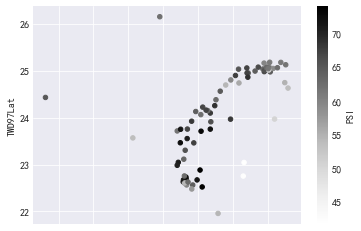

In [9]:
meta_mean.plot.scatter('TWD97Lon','TWD97Lat',c='PSI')

### 各測站的空汙情況 
該段時間空汙指標平均

In [10]:
meta_mean=datanew.groupby('SiteName').mean()
groupby_site=datanew.groupby('SiteName')
meta_mean

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,TWD97Lon,TWD97Lat
SiteName,,,,,,,,
三義,27.0,62.923077,3.307692,4.000000,61.923077,50.769231,120.758833,24.382942
三重,67.0,63.785714,6.142857,20.214286,NaN,63.785714,121.493806,25.072611
中壢,68.0,64.214286,6.714286,16.857143,NaN,64.214286,121.221667,24.953278
中山,12.0,59.461538,4.615385,11.076923,54.461538,52.076923,121.526528,25.062361
二林,35.0,68.153846,5.846154,5.230769,62.769231,65.615385,120.409653,23.925175
仁武,49.0,69.307692,8.461538,5.923077,66.692308,60.846154,120.332631,22.689056
冬山,66.0,53.714286,2.642857,4.714286,50.285714,48.357143,121.792928,24.632203
前金,56.0,69.692308,7.615385,6.076923,67.153846,59.769231,120.288086,22.632567
前鎮,57.0,58.000000,8.384615,NaN,NaN,58.000000,120.307564,22.605386


## 空汙指標關聯分析

用seaborn中的功能 將指標兩兩配對作圖並進行線性回歸
PSI和O3及PM10的關聯很明顯 是因PSI是由四個subindex中選出最高的 通常就是O3及PM10

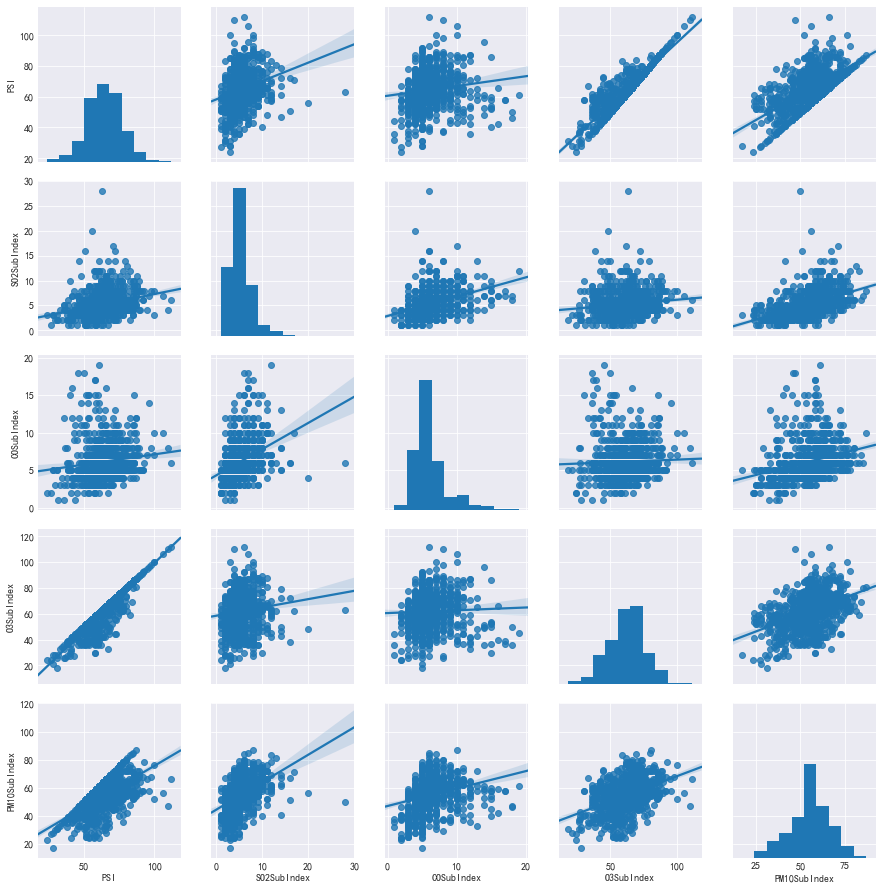

In [11]:
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['SimHei', 'Arial']})
sns.pairplot(data.dropna(), vars=[
    'PSI',
    'SO2SubIndex',
    'COSubIndex',
    'O3SubIndex',
    'PM10SubIndex'
], kind='reg')

加上不同顏色 代表各測站資料

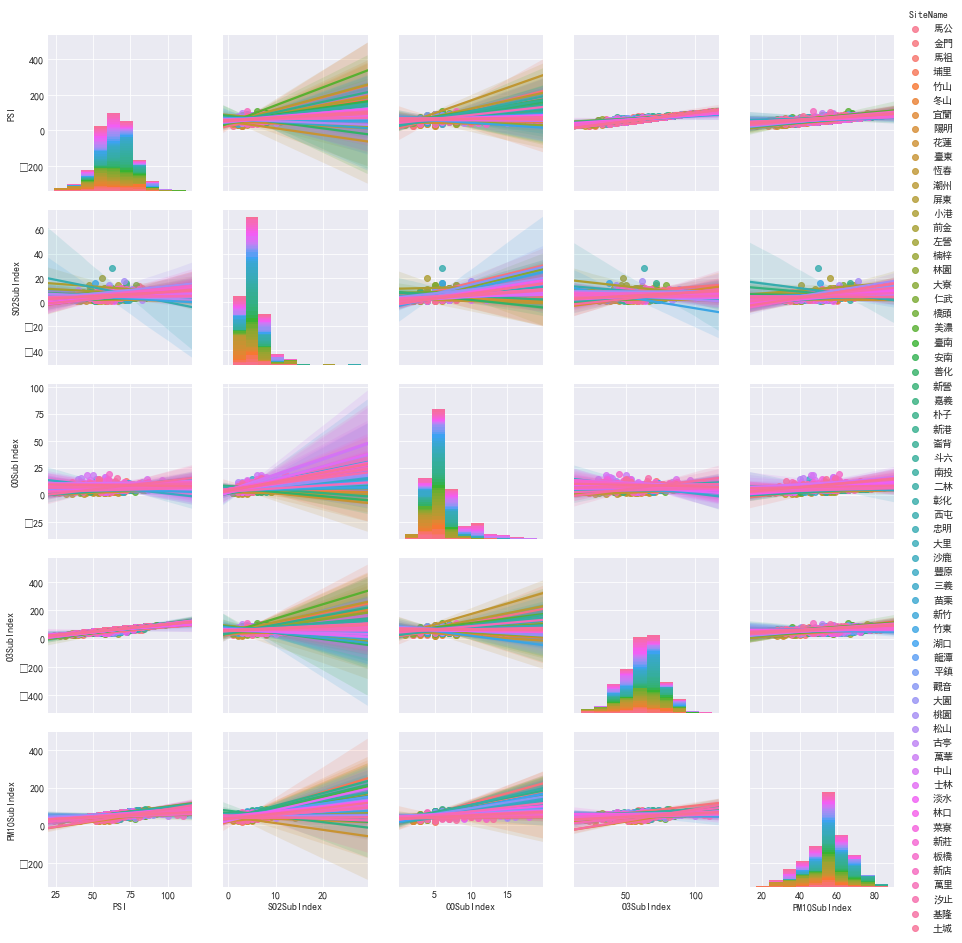

In [12]:
sns.pairplot(data.dropna(), vars=['PSI', 'SO2SubIndex','COSubIndex','O3SubIndex','PM10SubIndex'], kind='reg',hue='SiteName')

In [13]:
from statsmodels.formula.api import ols

O3與PM10SubIndex 線性回歸分析

In [14]:
model = ols("O3SubIndex ~ PM10SubIndex", data).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             O3SubIndex   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     219.7
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           2.61e-44
Time:                        01:50:51   Log-Likelihood:                -3323.6
No. Observations:                 840   AIC:                             6651.
Df Residuals:                     838   BIC:                             6661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.4848      2.068     15.223   

In [16]:
PSImodel = ols("PSI ~ SiteName+PM10SubIndex+SO2SubIndex+COSubIndex+O3SubIndex", data).fit()
print(PSImodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSI   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     130.1
Date:                Sun, 24 Jun 2018   Prob (F-statistic):               0.00
Time:                        01:50:51   Log-Likelihood:                -2175.2
No. Observations:                 820   AIC:                             4486.
Df Residuals:                     752   BIC:                             4807.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.9308      1.276      3.

In [17]:
aov_table = statsmodels.stats.anova.anova_lm(PSImodel, typ=2)
print(aov_table)

                    sum_sq     df            F         PR(>F)
SiteName      1.897048e+06   75.0  1966.770416   0.000000e+00
PM10SubIndex  2.970546e+03    1.0   230.979202   1.090329e-45
SO2SubIndex   6.437491e+01    1.0     5.005566   2.555814e-02
COSubIndex    5.526750e+01    1.0     4.297406   3.851060e-02
O3SubIndex    4.582879e+04    1.0  3563.484918  1.555679e-287
Residual      9.671220e+03  752.0          NaN            NaN


## 鄰近地區空汙分析 

選取士林及淡水兩地

In [18]:
pairData=data.concat([groupby_site.get_group('士林'),groupby_site.get_group('淡水')])

AttributeError: 'DataFrame' object has no attribute 'concat'



PSI與測站地點及各SubIndex的線性回歸


In [ ]:
PSImodel = ols("PSI ~ SiteName+PM10SubIndex+SO2SubIndex+COSubIndex+O3SubIndex", pairData).fit()
print(PSImodel.summary())



ANOVA分析 地點差異對PSI的影響不顯著


In [ ]:
aov_table = statsmodels.stats.anova.anova_lm(PSImodel, typ=2)
print(aov_table)